In [1]:
import numpy as np
import pandas as pd

In [2]:
p,f = "class.csv","zoo.csv"

In [3]:
data,classi = pd.read_csv(f),pd.read_csv(p)

In [4]:
y_verita = data['class_type'].to_numpy() ###questo è l'array verità in base al quale confrontare i vari risultati di clustering 
print(y_verita)

[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]


# Preprocessing

In [5]:
X = data.drop(['animal_name']+['class_type'],axis=1)
### Eliminiamo dal dataframe i nomi degli animali che sono una variabile categorica e la classe di appartenenza che 
### vogliamo trovare con gli algoritmi di clustering

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
Xs = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
###come sappiamo applicando uno scaler otteniamo un oggetto numpy, perciò ricreiamo il dataframe utilizzando gli indici di colonna originali

In [8]:
Xs
### Come abbiamo visto il nostro dataset non contiene valori nulli e tutti gli attributi hanno valori booleani 1 o 0 
### a eccezione della colonna legs, perciò ho applicato MinMaxScaler per scalare i valori in modo che anche legs 
### assuma valori tra 0 e 1.
### A questo punto i dati sono pronti per applicare gli algoritmi di clustering.

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


# Clustering

Kmeans

In [9]:
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering,DBSCAN,Birch
from sklearn.decomposition import PCA

In [10]:
kmeans = KMeans(n_clusters= 7,random_state=0)
### Random state è un parametro che ci serve per fare in modo che i centroidi di partenza siano determinati a partire 
### da un numero, e non generati casualmente in modo che ripetendo il clustering tutte le volte abbiamo lo stesso 
### risultato
y_pred_k = kmeans.fit_predict(Xs)

Agglomerative clustering

In [11]:
aggc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward' )
y_pred_aggc =aggc.fit_predict(Xs)

Agglomerative clustering usa un metodo di clustering gerarchico agglomerativo. Questa strategia bottom-up parte inserendo ciascun oggetto nel proprio cluster e, successivamente, fondendo questi cluster atomici in cluster sempre più larghi, fino a quando tutti gli oggetti si trovano in un singolo cluster oppure fino a quando non vengono soddisfatte determinate condizioni di terminazione.Nel nostro caso il criterio di raggruppamento per i cluster atomici è di minimizzare la somma delle differenze tra i cluster al quadrato.

SpectralClustering

In [12]:
spc = SpectralClustering(n_clusters=7, assign_labels="discretize", random_state=0)
y_pred_spc = spc.fit_predict(Xs)

Le tecniche di clustering spettrale fanno uso dello spettro ( autovalori ) della matrice di similarità dei dati per eseguire la riduzione della dimensionalità prima del clustering in meno dimensioni. Nel caso di dataset in cui la matrice delle caratteristiche è sparsa come nel nostro si rivela particolarmente efficiente.

DBSCAN

In [13]:
pca = PCA(2)
Xv = pca.fit_transform(Xs)
### Applichiamo la principal component analysis per comprimere i dati in due dimensioni, questo ci permette sia di
### ottenere un risultato migliore per l'algoritmo Dbscan, sia useremo questa matrice in due dimensioni per 
### visualizzare i risultati del clustering.

dbscan =DBSCAN(eps=0.3,min_samples=4)
y_pred_dbscan = dbscan.fit_predict(Xv)

Dbscan è un esempio di clustering density-based in cui il raggruppamento avviene analizzando l'intorno di ogni 
punto dello spazio. In particolare, viene considerata la densità di punti in un intorno di raggio fissato.

Birch

In [14]:
brc = Birch(n_clusters=7, threshold = 0.1)
y_pred_brc = brc.fit_predict(Xs)

Birch è un algoritmo gerarchico intregrato, molto più efficente degli altri in termini di memoria perchè con una singola scansione è in grado di fornire il clustering.
I singoli data points vengono inseriti nel cluster 'foglia' più vicino, dopodichè si verifica che il diametro del cluster non sia maggiore della soglia impostata, in caso contrario viene suddiviso fino al soddisfacimento delle condizioni soglia.

# Results visualization

In [15]:
import matplotlib.pyplot as plt

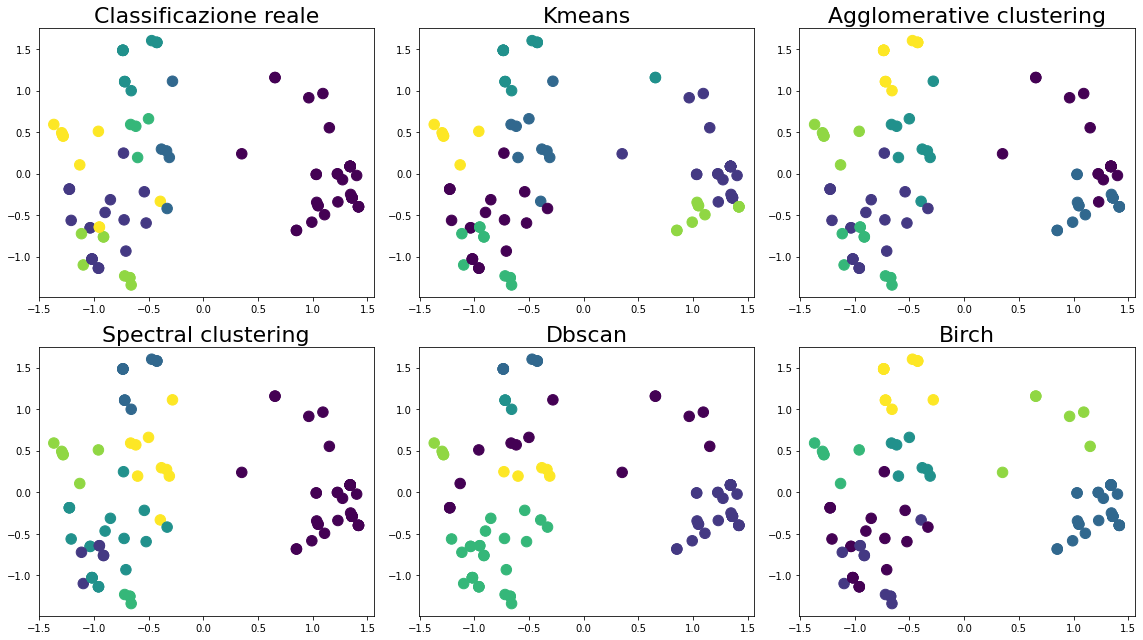

In [16]:
fig, ax = plt.subplots(figsize=(16,9),ncols=3, nrows=2)
ax[0][0].scatter(Xv[:,0],Xv[:,1], s=110, c=y_verita)
ax[0][1].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_k)
ax[0][2].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_aggc)
ax[1][0].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_spc)
ax[1][1].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_dbscan)
ax[1][2].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_brc)

ax[0][0].set_title('Classificazione reale', fontsize = 22)
ax[0][1].set_title('Kmeans', fontsize = 22)
ax[0][2].set_title('Agglomerative clustering', fontsize = 22)
ax[1][0].set_title('Spectral clustering', fontsize = 22)
ax[1][1].set_title('Dbscan', fontsize = 22)
ax[1][2].set_title('Birch',fontsize = 22)

plt.tight_layout()
plt.show()
### Visualizziamo i diversi risultati di clustering sulle coordinate dei nostri animali portate in 2 dimensioni.

In [28]:
from scipy.cluster.hierarchy import dendrogram , linkage


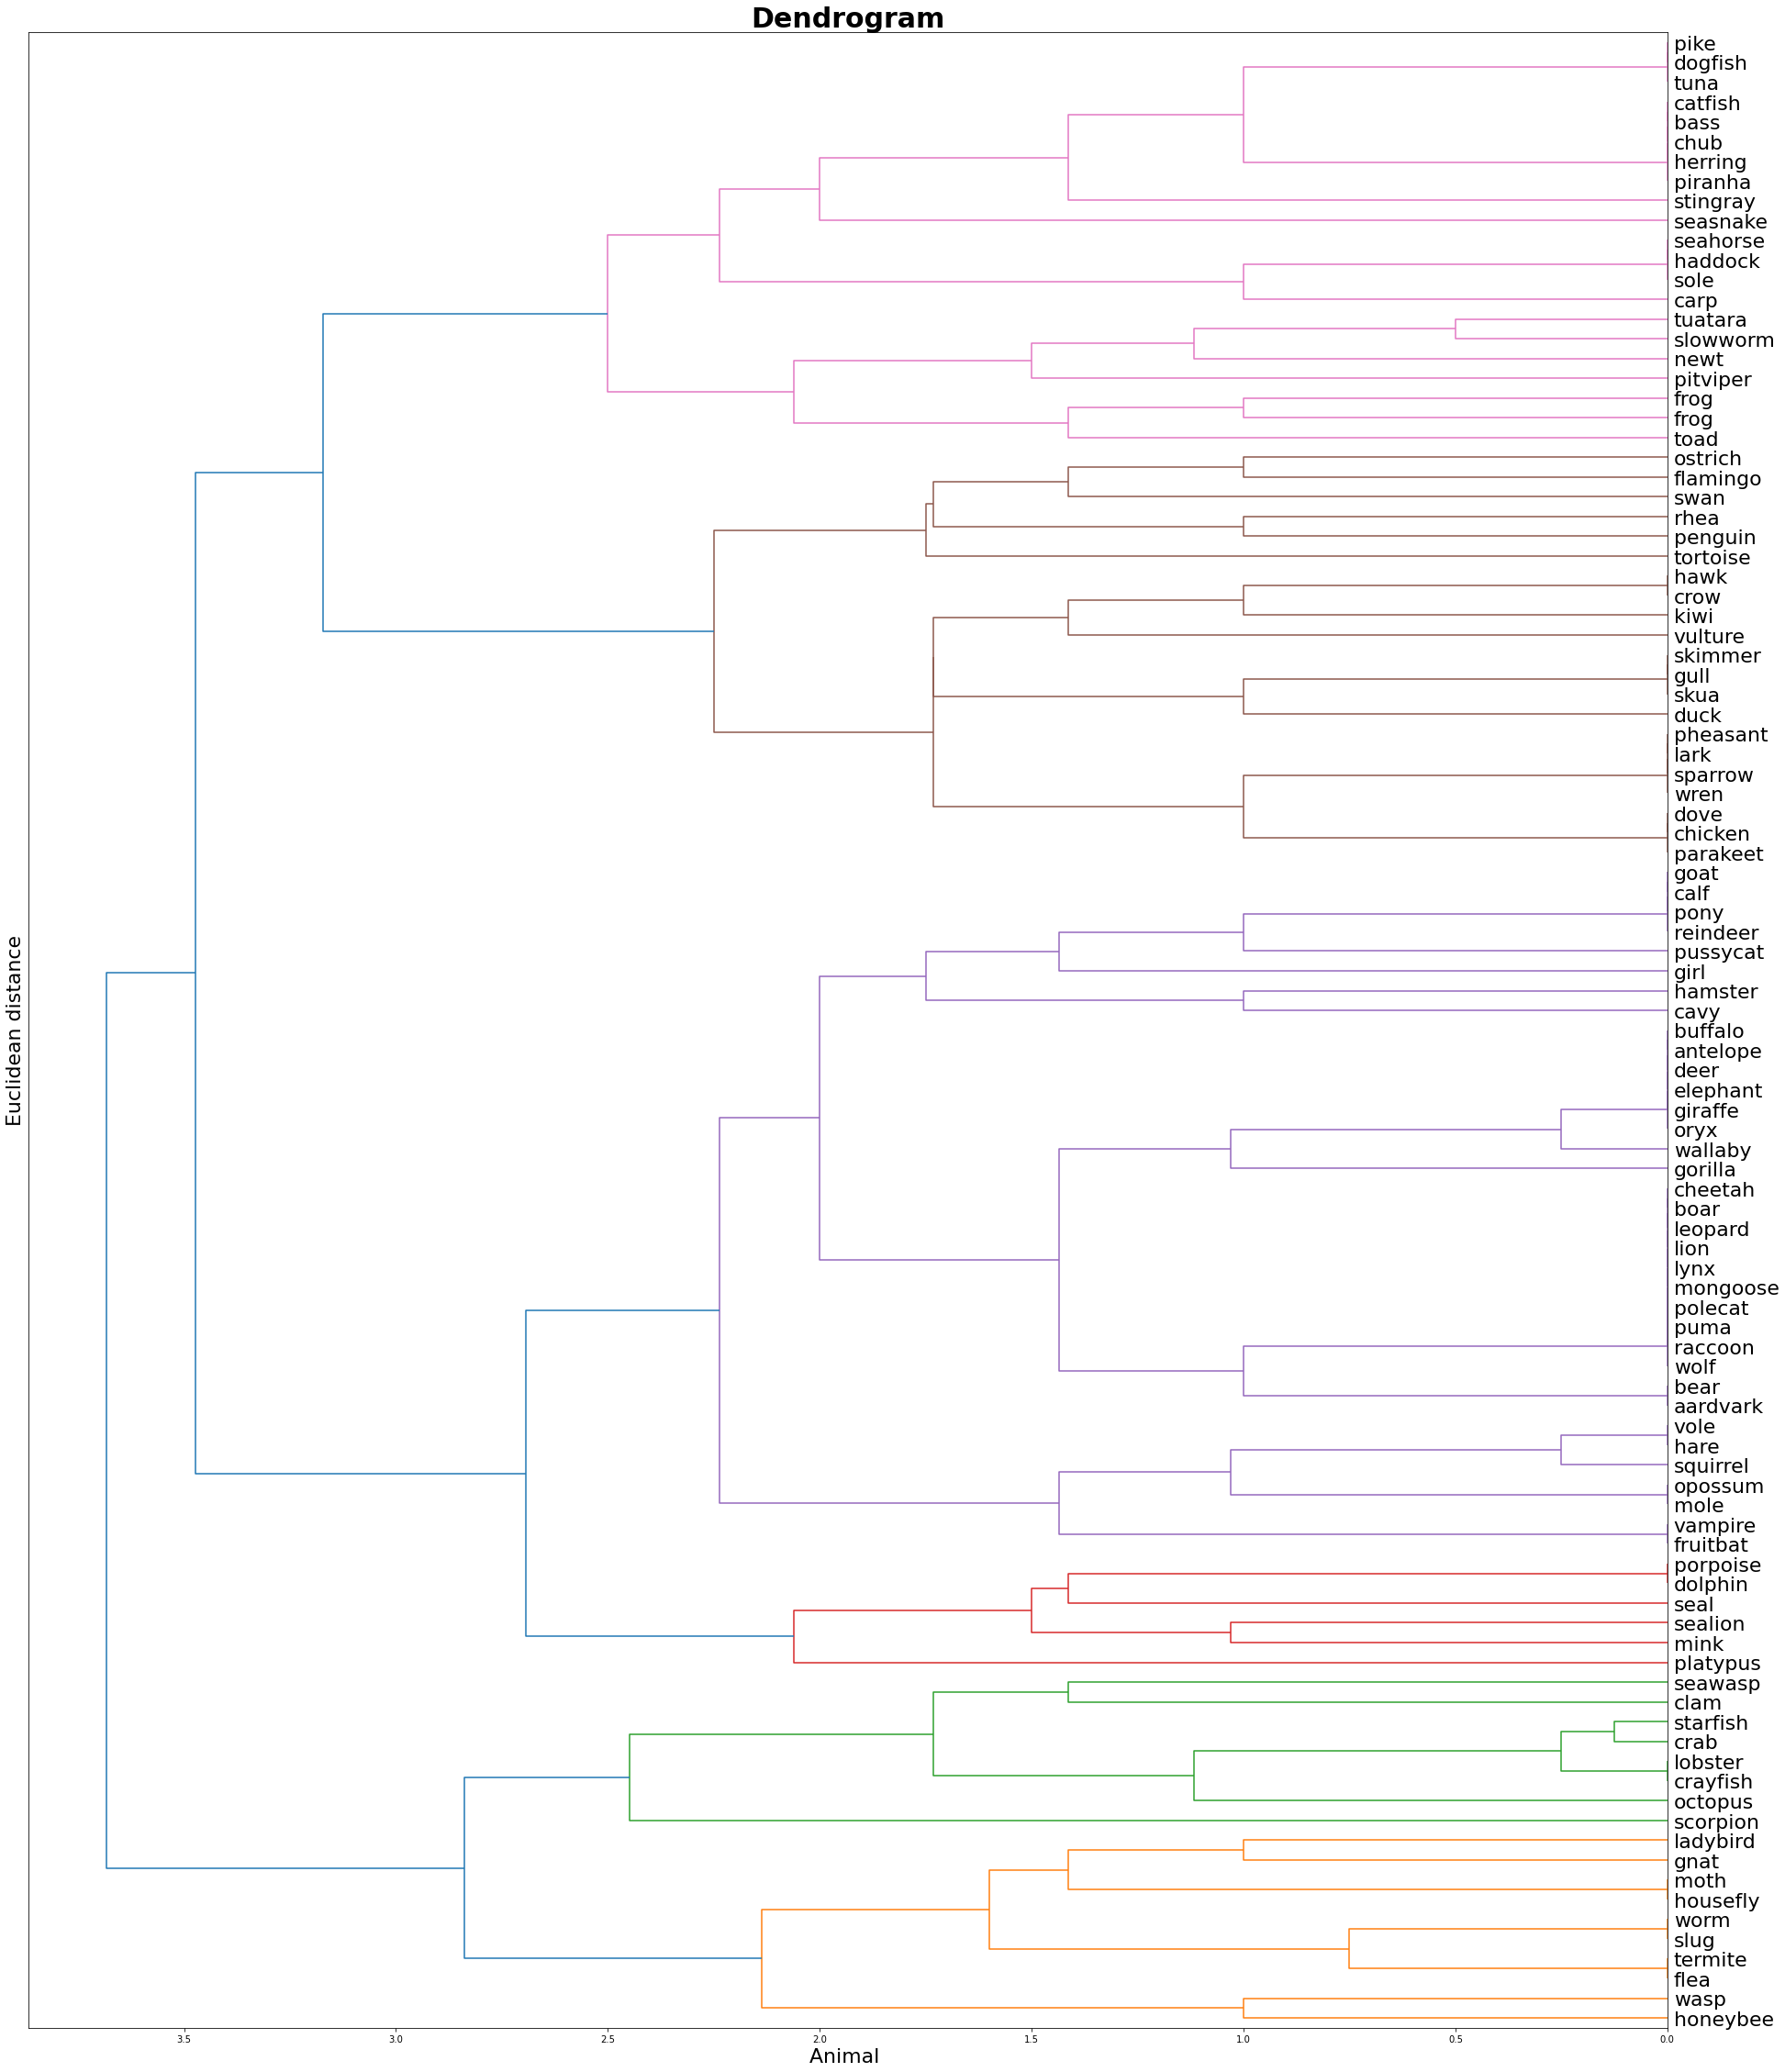

In [50]:
## Visualizzo un dendogramma per avere una rappresentazione grafica del clustering gerarchico tra le varie specie

Z = linkage(Xs, method = 'complete')
 
plt.figure(figsize = (32,40))
dendro = dendrogram(Z, orientation = "left",
                   labels=[x for x in data["animal_name"]],
                   leaf_font_size=22)
plt.title("Dendrogram", fontsize = 30, fontweight="bold")
plt.ylabel('Euclidean distance', fontsize = 22)
plt.xlabel("Animal ", fontsize = 22)
plt.show()

# Benchmark e interpretazione

In [17]:
from sklearn.metrics import adjusted_rand_score, completeness_score

Utilizziamo due metriche diverse per verificare quanto il risultato ottenuto con gli algoritmi di clustering sia accurato rispetto alla ground truth.

La prima metrica (completeness_score) misura la completezza del risultato data una ground truth, un risultato sarà cioè 'completo' e avrà un punteggio massimo uguale a 1 se tutti i dati appartenti alla stessa classe  sono inseriti nello stesso cluster.

La seconda metrica (adjusted_rand_score) invece misura la similarità considerando tutte le coppie di punti e contando quante di queste coppie sono assegnate nello stesso gruppo o in gruppi diversi per entrambi il clustering reale e quello predetto.


Kmeans

In [18]:
risultati = {}
k_c= completeness_score(y_verita,y_pred_k)
k_a = adjusted_rand_score(y_verita,y_pred_k)
risultati['Kmeans'] =[k_c,k_a]

AgglomerativeClustering

In [19]:
aggc_c= completeness_score(y_verita,y_pred_aggc)
aggc_a = adjusted_rand_score(y_verita,y_pred_aggc)
risultati['Agglomerative clustering']=[aggc_c,aggc_a]

SpectralClustering

In [20]:
spc_c= completeness_score(y_verita,y_pred_spc)
spc_a = adjusted_rand_score(y_verita,y_pred_spc)
risultati['Spectral clustering']=[spc_c,spc_a]

DBSCAN

In [21]:
dbscan_c= completeness_score(y_verita,y_pred_dbscan)
dbscan_a = adjusted_rand_score(y_verita,y_pred_dbscan)
risultati['Dbscan']=[dbscan_c,dbscan_a]

Birch

In [22]:
brc_c= completeness_score(y_verita,y_pred_brc)
brc_a = adjusted_rand_score(y_verita,y_pred_brc)
risultati['Birch']=[brc_c,brc_a]

In [23]:
risultati

{'Kmeans': [0.7751030251507829, 0.6940118633468724],
 'Agglomerative clustering': [0.7935737537548521, 0.6828773460462316],
 'Spectral clustering': [0.9037420936277645, 0.9475184399253236],
 'Dbscan': [0.6714967974497269, 0.6242163665580235],
 'Birch': [0.8417081325549081, 0.8210050594486954]}

L'algoritmo migliore si rivela essere lo spectral clustering, il peggiore Dbscan

In [24]:
## funzione per trovare la posizione di ogni membro del cluster nel dataset originale 
def select_points(X, y_pred, cluster_label):
    pos = [i for i, x in enumerate(y_pred) if x == cluster_label]
    return X.iloc[pos]

In [25]:
select_points(data,y_pred_spc,3)
###  Tutti animali dello stesso class_type eccetto la tartaruga come ci aspettiamo visto il punteggio molto 
###  alto dell'algoritmo spectral clustering

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
16,crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
21,duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
23,flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
33,gull,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2
37,hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
41,kiwi,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0,2
43,lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
56,ostrich,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2


In [26]:
select_points(data,y_pred_dbscan,3)
### dbscan invece conferma il punteggio basso mettendo nella stessa classe animali piuttosto diversi

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
16,crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
21,duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
23,flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
37,hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
